# Dependencies

In [2]:
import osmnx as ox
import numpy as np 
import networkx as nx 
import pandas as pd

from matplotlib import pyplot as plt

# Overview 
The following functions are used to plot a patient's journey given either their correponding dataframe or arrays of latitude, longitude, and the variable which will determine the hue of each point in the resulting scatterplot. 

In [26]:
def graph_from_pos(lon: np.array, lat: np.array, delta: float = 0.1) -> nx.Graph:
    """
    lon: array-like of longitude values to fit in graph
    lat: array-like of latitude values to fit in graph
    delta: fraction by which symmetrically increase graph range e.g.: delta=0.1 increases latitude and 
    longitude range by 10%

    returns: osmnx.MultiDiGraph instance
    """
    lon_max, lon_min = lon.max(), lon.min()
    lat_max, lat_min = lat.max(), lat.min()

    lon_d = (lon_max - lon_min) * delta / 2
    lat_d = (lat_max - lat_min) * delta / 2

    return ox.graph_from_bbox(lat_max + lat_d, lat_min - lat_d, lon_max + lon_d, lon_min - lon_d)


def plot_patient(
        data: pd.DataFrame,
        lon: str = 'gpsLongitude',
        lat: str = 'gpsLatitude',
        var: str = 'pm2_5',
        G: nx.Graph = None,
        delta: float = 1.0,
        connect: bool = False,
        ax: plt.Axes = None,
        edgecolors: str = 'white',
        figsize=(15, 15),
):
    """
    data: pandas.DataFrame
    lon: key in data or array-like representing longitude
    lat: key in data or array-like representing latitude
    var: key in data or array-like representing measurement variable by which scatter points will be coloured.
    G: networkx graph instance. If None provided, will fetch a new graph based on lon and lat coordinates,
    but SIGNIFICANTLY increases running time.
    connect: add lines between consecutive points

    """
    lon_ = data[lon] if isinstance(lon, str) else lon
    lat_ = data[lat] if isinstance(lat, str) else lat
    var_ = data[var] if isinstance(var, str) else var

    if G is None:
        G = graph_from_pos(lon=lon_, lat=lat_, delta=delta)
    if ax is None:
        fig, ax = ox.plot_graph(G, node_alpha=0.0, figsize=figsize, show=False, close=False)
    else: 
        fig = ax.get_figure() 

    scatter = ax.scatter(lon_, lat_, c=var_, edgecolors=edgecolors)
    if connect:
        ax.plot(lon_, lat_, c='red', alpha=0.5)

    # TODO 
    cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
    cbar = plt.colorbar(scatter, cax=cax)
    if isinstance(var, str):
        cbar.ax.get_yaxis().labelpad = 15
        cbar.ax.set_ylabel(var, rotation=270)

    return ax, G

# Example 

In [20]:
df = pd.read_csv('../DAPHNE/data/calibrated/DAP001(2)_airspeck_personal_manual.csv', 
                usecols=['gpsLongitude', 'gpsLatitude', 'pm2_5', 'timestamp'], 
                parse_dates=['timestamp'], 
                index_col='timestamp')

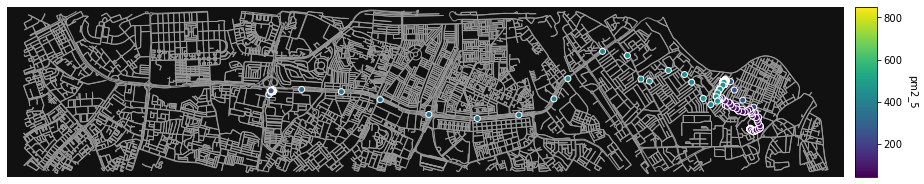

In [23]:
ax, G = plot_patient(data=df)

Graph processing done


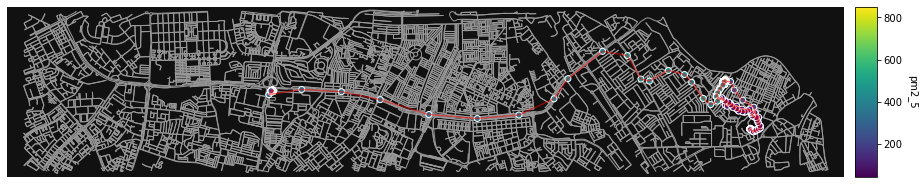

In [28]:
plot_patient(data=df, G=G, connect=True);